In [26]:
import torch
import torch.nn as nn
from pytorch_lightning.utilities.parsing import AttributeDict
import numpy as np
import matplotlib.pyplot as plt

In [190]:
def make_backend(parameters):
    modules = []
    input_dimension = parameters.input_dimension
    output_dimension = 2
    for dimension in parameters.hidden_dimensions:
        modules.append(nn.Linear(input_dimension, dimension))
        input_dimension = dimension
        modules.append(nn.ReLU())
    modules.append(nn.Linear(input_dimension, output_dimension))
    return nn.Sequential(*modules)

def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.01)

In [191]:
class Reshape(nn.Module):
    def __init__(self, output_shape):
        self._output_shape = output_shape
        super().__init__()
        
    def forward(self, x):
        return x.reshape(-1, *self._output_shape)

In [192]:
Reshape([8, 2])(input_vector).shape

(20000, 8, 2)

In [193]:
conv1d_model = nn.Sequential(
    Reshape([2, 16]),
    nn.Conv1d(2, 16, 3, padding=1),
    nn.Conv1d(16, 32, 3, padding=1),
    nn.Conv1d(32, 32, 3, padding=1),
    Reshape([32 * 8]),
    nn.Linear(32 * 8, 2)
)

In [209]:
model = make_backend(AttributeDict(input_dimension=32, hidden_dimensions=(16, 8, 8)))
init_weights(model)

In [225]:
input_vector = np.random.randint(2, size=(2000, 32)).astype(np.float32) * 2 - 1

In [226]:
np.std(input_vector)

0.9999954

In [231]:
input_vector_norm = np.random.randn(2000, 32).astype(np.float32)

In [232]:
np.std(input_vector_norm)

1.0022103

In [229]:
points = model(torch.tensor(input_vector)).cpu().detach().numpy()

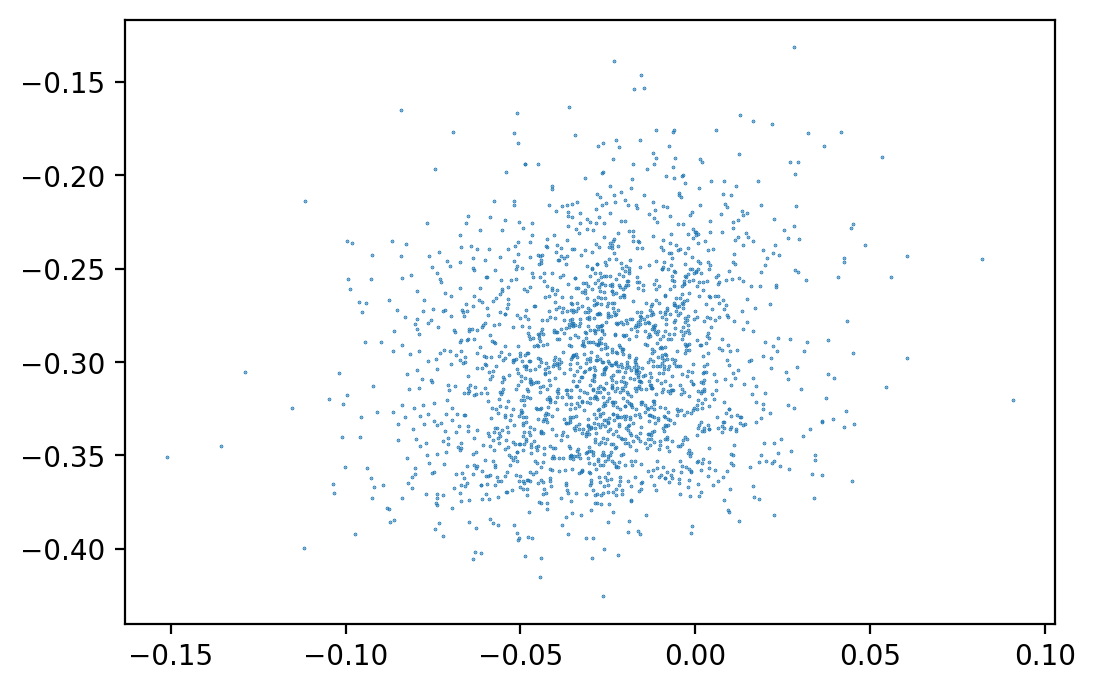

In [230]:
plt.figure(dpi=200)
plt.scatter(points[:, 0], points[:, 1], s=0.1)

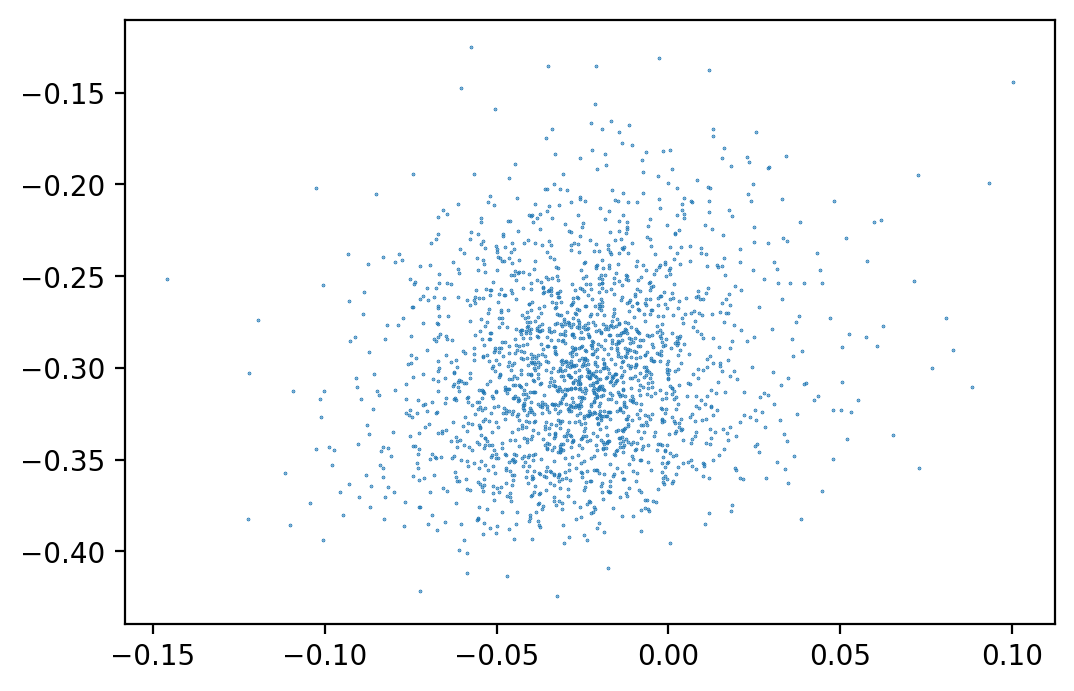

In [233]:
points = model(torch.tensor(input_vector_norm)).cpu().detach().numpy()
plt.figure(dpi=200)
plt.scatter(points[:, 0], points[:, 1], s=0.1)

In [139]:
conv1d_model(torch.tensor(input_vector))

tensor([[ 0.0868,  0.1568],
        [-0.1430, -0.0623],
        [ 0.0681, -0.0695],
        ...,
        [-0.0552,  0.1088],
        [ 0.2877,  0.2387],
        [ 0.0651,  0.2134]], grad_fn=<AddmmBackward>)

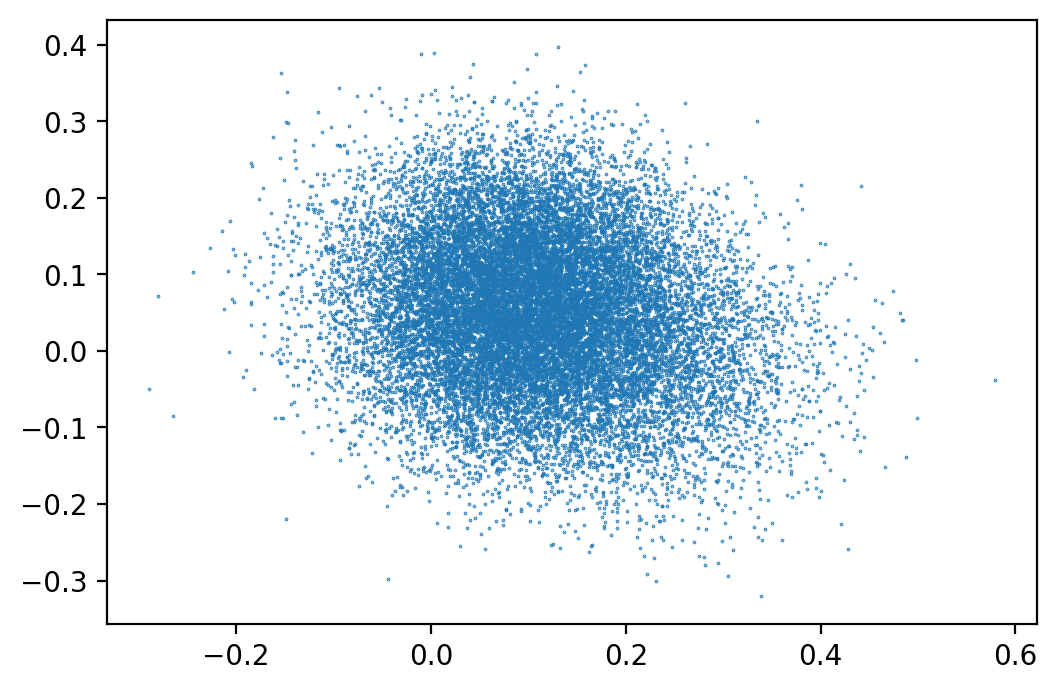

In [154]:
points = conv1d_model(torch.tensor(input_vector)).cpu().detach().numpy()
plt.figure(dpi=200)
plt.scatter(points[:, 0], points[:, 1], s=0.1)

(20000, 2)


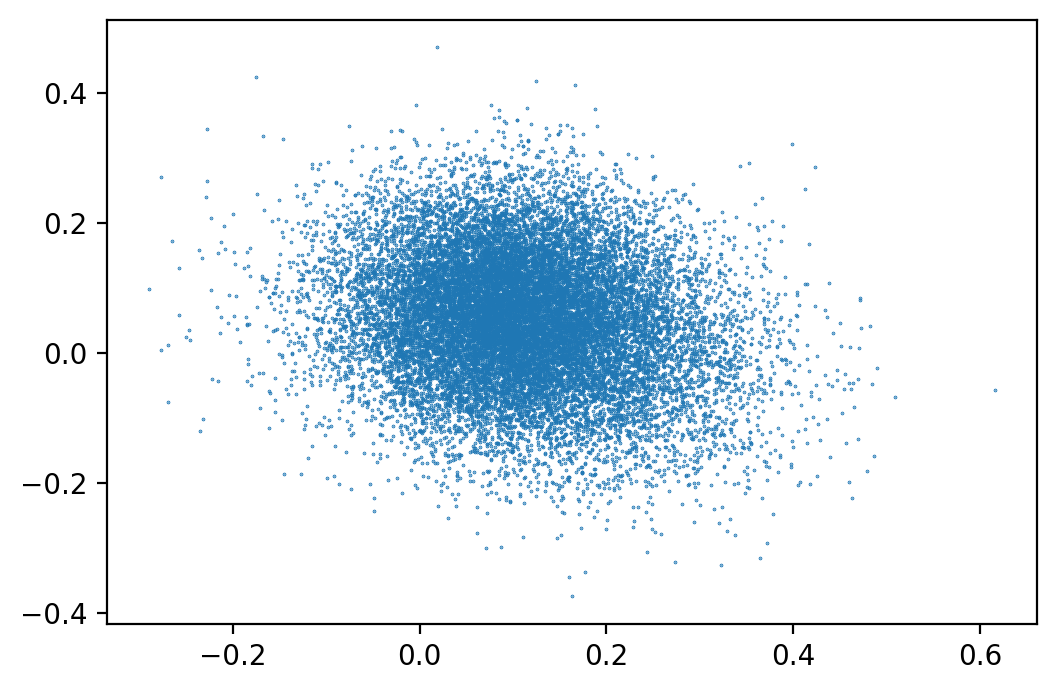

In [155]:
points = conv1d_model(torch.tensor(input_vector_norm)).cpu().detach().numpy()
print(points.shape)
plt.figure(dpi=200)
plt.scatter(points[:, 0], points[:, 1], s=0.1)

In [157]:
2 ** 32

4294967296